In [1]:
#python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Loading mall customer dataset from local CSV file
df = pd.read_csv('C:/Users/HP/Downloads/mall_customer.csv')

In [3]:
# Displaying the first 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Displaying summary information about the dataset (columns, data types, non-null counts, memory usage)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Generating statistical summary of numerical columns (count, mean, std, min, max, quartiles)
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


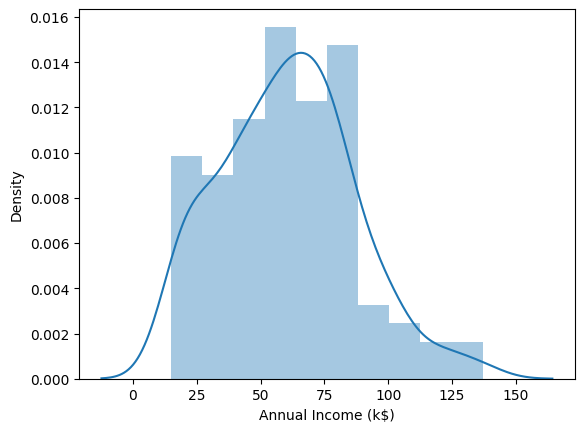

In [6]:
# Plotting the distribution of customers' annual income
sns.distplot(df['Annual Income (k$)']);

In [7]:
# Displaying all column names in the dataset
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

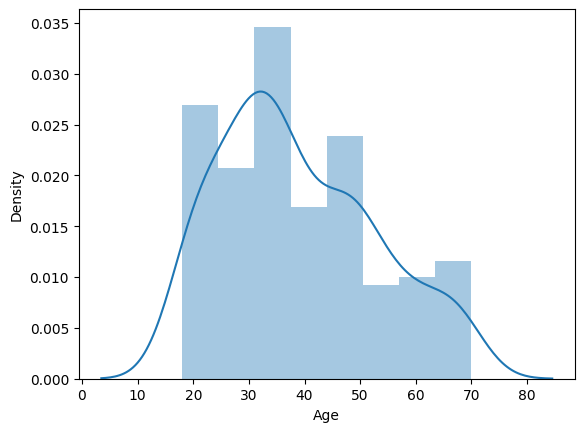

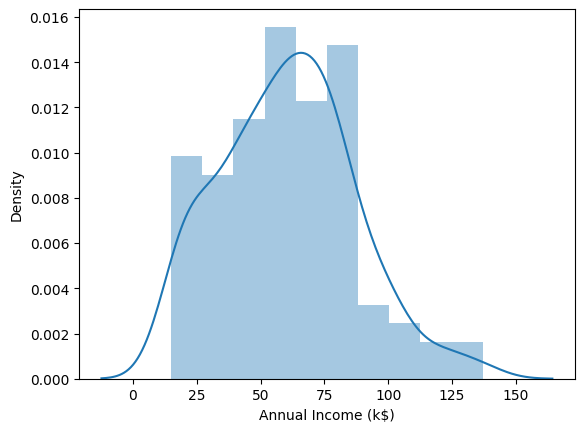

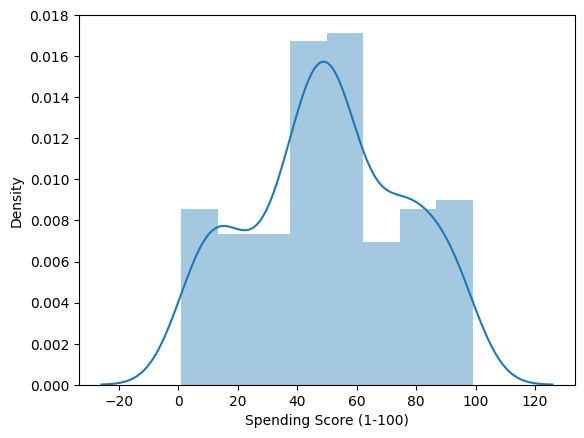

In [8]:
# Plot distribution of Age, Annual Income, and Spending Score using Seaborn

columns = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

# Gender

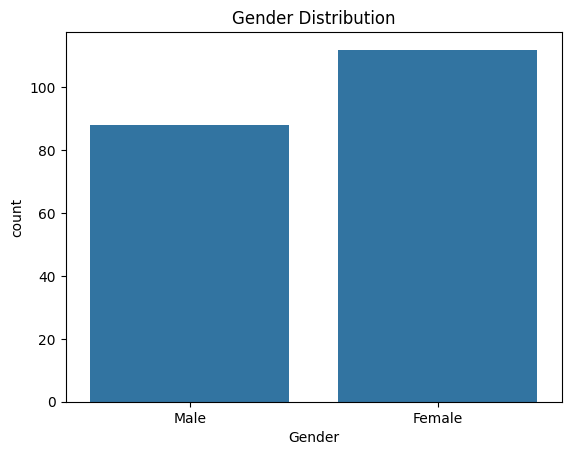

In [9]:
# Gender distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

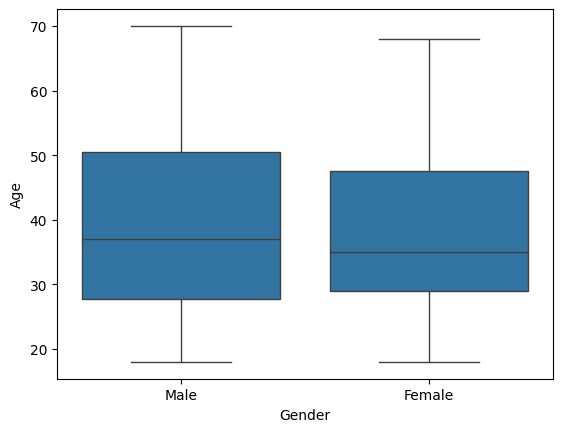

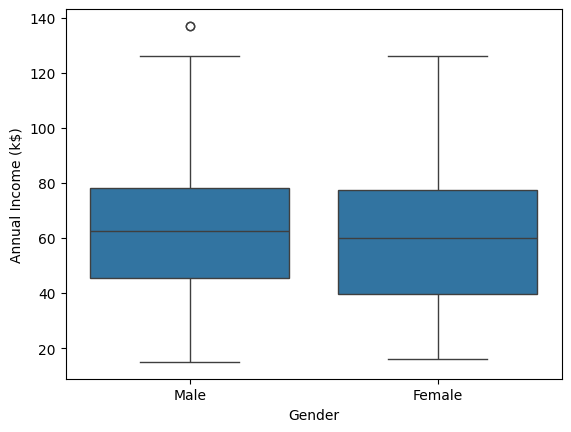

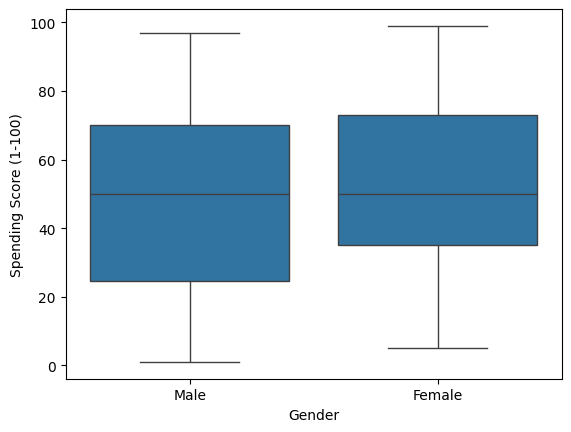

In [10]:
# Create boxplots to compare Age, Annual Income, and Spending Score across genders

columns = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

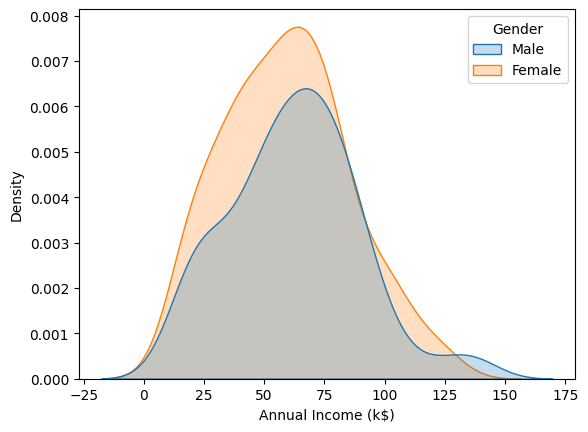

In [11]:
# Plot Kernel Density Estimation of Annual Income by Gender with filled areas

sns.kdeplot(data=df, x="Annual Income (k$)", hue="Gender", fill=True)

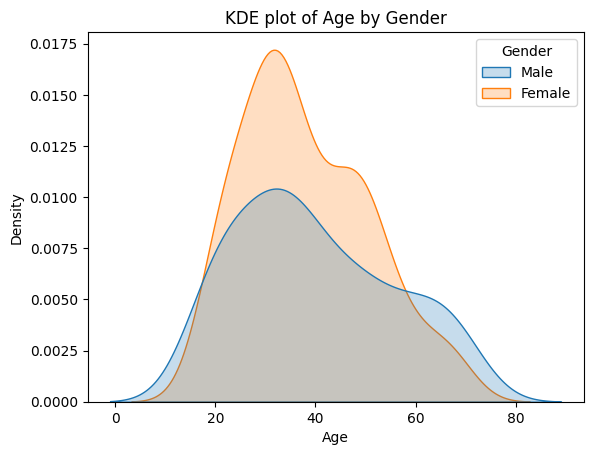

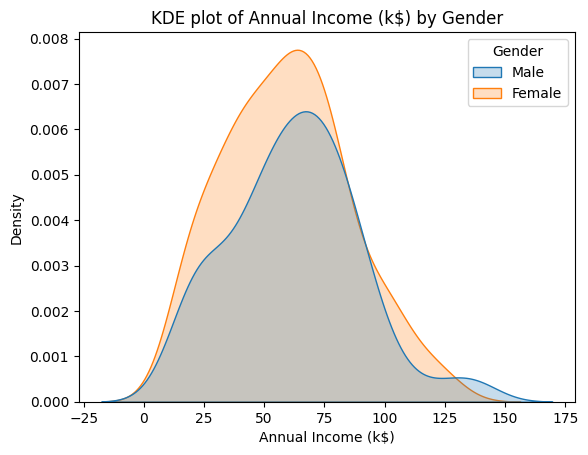

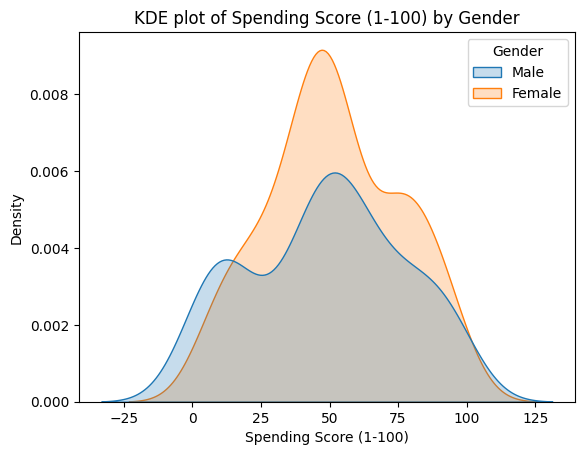

In [12]:
# Plot KDE for each column (Age, Annual Income, Spending Score) by Gender with titles

for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue="Gender", fill=True)
    plt.title(f"KDE plot of {i} by Gender")
    plt.show()


In [13]:
# Display the proportion of each gender category in the dataset

df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Age

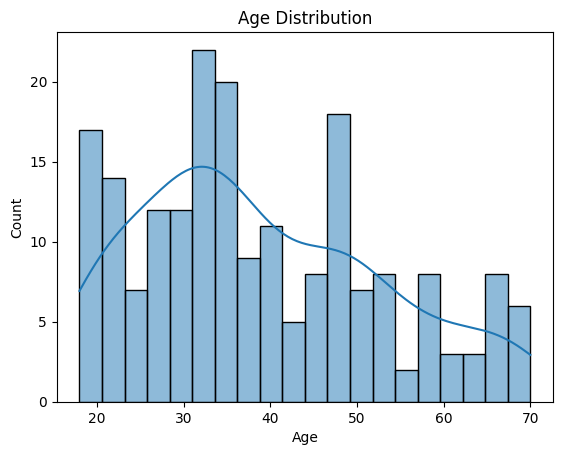

In [14]:
# Plot histogram of Age with 20 bins and overlay a KDE curve

sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Annual Income vs Spending Score

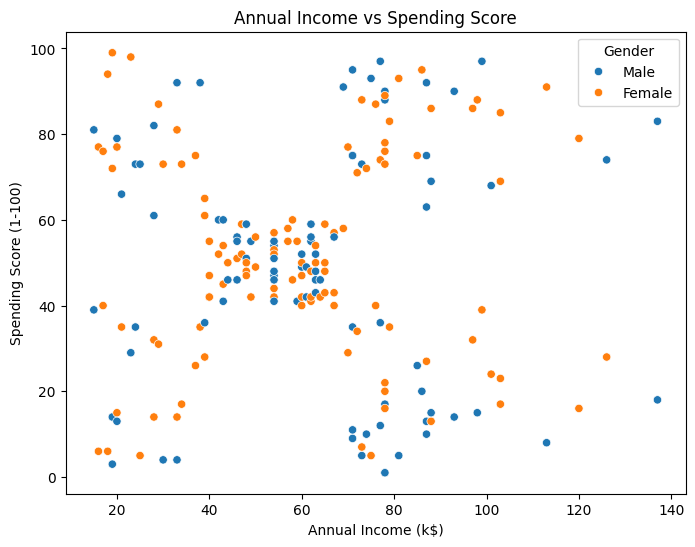

In [15]:
# Scatter plot of Annual Income vs Spending Score, colored by Gender

plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title("Annual Income vs Spending Score")
plt.show()

# Elbow Method

In [16]:
# Select Age, Annual Income, and Spending Score columns as features for analysis or modeling

x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [17]:
# Standardize the feature values to have mean 0 and standard deviation 1

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

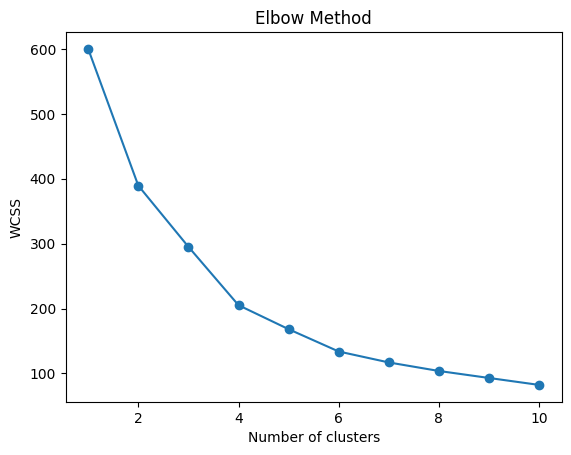

In [18]:
# Use Elbow Method to find optimal number of clusters by plotting WCSS for k=1 to 10

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Calculate Silhouette Score for different k values (2 to 10) to evaluate clustering quality

from sklearn.metrics import silhouette_score

# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Try different values of k
for k in range(2, 11):   # start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"For k={k}, Silhouette Score = {score:.3f}")


For k=2, Silhouette Score = 0.332
For k=3, Silhouette Score = 0.336
For k=4, Silhouette Score = 0.405
For k=5, Silhouette Score = 0.358
For k=6, Silhouette Score = 0.416
For k=7, Silhouette Score = 0.442
For k=8, Silhouette Score = 0.433
For k=9, Silhouette Score = 0.409
For k=10, Silhouette Score = 0.397


# Apply kmeans

In [20]:
# Apply KMeans with 5 clusters, assign cluster labels, and add them to the dataset

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster column to original dataset
df['Cluster'] = clusters

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  


# Age vs Spending Score

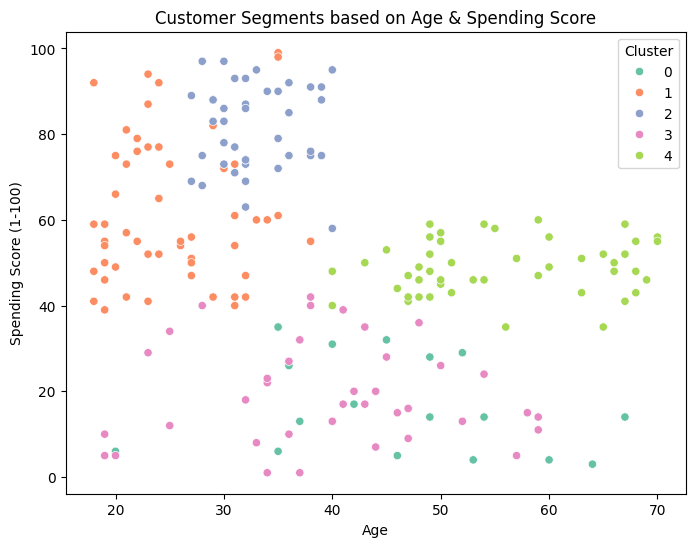

In [21]:
# Scatter plot of Age vs Spending Score with points colored by cluster assignment

plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='Set2')
plt.title("Customer Segments based on Age & Spending Score")
plt.show()

# cluster profiling

In [22]:
# Compute average Age, Annual Income, and Spending Score for each cluster to profile segments

cluster_profile = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Profile:\n", cluster_profile)

Cluster Profile:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


# 2D scatter plots showing clusters


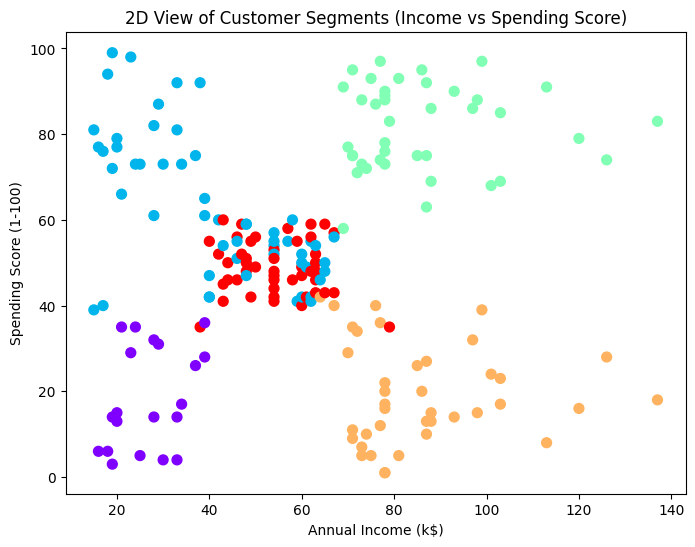

In [23]:
# Visualize customer clusters in a 2D scatter plot of Annual Income vs Spending Score

plt.figure(figsize=(8,6))
plt.scatter(
    df['Annual Income (k$)'], 
    df['Spending Score (1-100)'], 
    c=df['Cluster'], 
    cmap='rainbow', 
    s=50
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("2D View of Customer Segments (Income vs Spending Score)")
plt.show()


# 3D scatter plots showing clusters

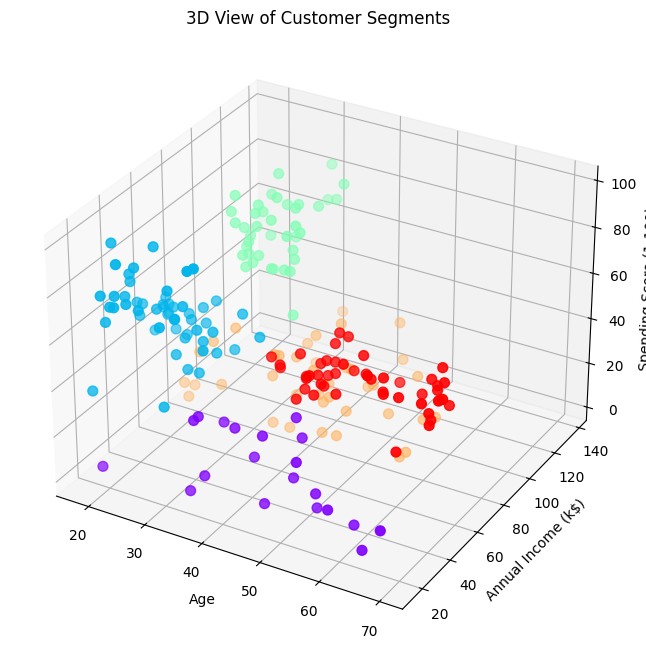

In [29]:
# Create a 3D scatter plot of Age, Annual Income, and Spending Score colored by clusters

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], 
           c=df['Cluster'], cmap='rainbow', s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title("3D View of Customer Segments")
plt.show()

In [25]:
# Average Age per cluster
avg_age = df.groupby('Cluster')['Age'].mean().round(2)
print("Average Age per Cluster:")
print(avg_age)


Average Age per Cluster:
Cluster
0    46.25
1    25.19
2    32.88
3    39.87
4    55.64
Name: Age, dtype: float64


In [26]:
# Average Annual Income per cluster
avg_income = df.groupby('Cluster')['Annual Income (k$)'].mean().round(2)
print("Average Annual Income per Cluster:")
print(avg_income)


Average Annual Income per Cluster:
Cluster
0    26.75
1    41.09
2    86.10
3    86.10
4    54.38
Name: Annual Income (k$), dtype: float64


In [27]:
# Average Spending Score per cluster
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean().round(2)
print("Average Spending Score per Cluster:")
print(avg_spending)


Average Spending Score per Cluster:
Cluster
0    18.35
1    62.24
2    81.53
3    19.36
4    48.85
Name: Spending Score (1-100), dtype: float64


In [28]:
# Gender ratio per cluster
gender_ratio = df.groupby(['Cluster', 'Gender']).size().unstack().fillna(0)

# Convert counts to percentages within each cluster
gender_ratio = (gender_ratio.T / gender_ratio.sum(axis=1)).T.round(2) * 100

print("Gender Ratio (% per Cluster):")
print(gender_ratio)


Gender Ratio (% per Cluster):
Gender   Female  Male
Cluster              
0          60.0  40.0
1          59.0  41.0
2          55.0  45.0
3          49.0  51.0
4          57.0  43.0


# Strategies 

# High Income, High Spending
Rich people who like to spend freely on premium products.

# Strategy:
Promote luxury, exclusivity, premium quality.

Offer VIP services, limited editions, and personalization.

Use status and lifestyle appeal in ads.

# High Income, Low Spending (Careful Spenders)

They have a lot of money, but they don’t like to spend quickly. Mostly older or careful people.

# Strategy:
Show them quality and durability (things that last long).

Offer loyalty programs so they feel rewarded for staying with you.

Give value-for-money offers (not cheap, but worth the price).

# Low Income, High Spending 

Young people who don’t earn much but still love to shop.

# Strategy
Give discounts, EMI/pay later options.

Offer affordable but trendy products.

Create bundle/combo deals (buy 2 get 1).

# Low Income, Low Spending 

People with less money and who spend carefully.

# Strategy:
Focus on low-priced products.

Give seasonal discounts.

Provide bulk offers like “family pack”, “buy more" or "save more”

# Moderate Income, Moderate Spending

Who they are: Middle-class families, earn and spend in a balanced way.

# Strategy:
Use family promotions (like kids + parents offers).

Do upselling (suggest a slightly better product).

Do cross-selling (offer related items, like shoes with clothes).